In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/hemant./Tension Intel


In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.21 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 145.3/460.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/Users/hemant./Tension Intel
100%|██████████████████████████████████████| 6.23M/6.23M [00:01<00:00, 5.91MB/s]
Ultralytics YOLOv8.2.21 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|█████████████████████████████████████████| 104k/104k [00:00<00:00, 606kB/s]
image 1/1 /Users/hemant./Tension Intel/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 50.2ms
Speed: 5.4ms preprocess, 50.2ms inference, 498.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/Users/hemant./Tension Intel


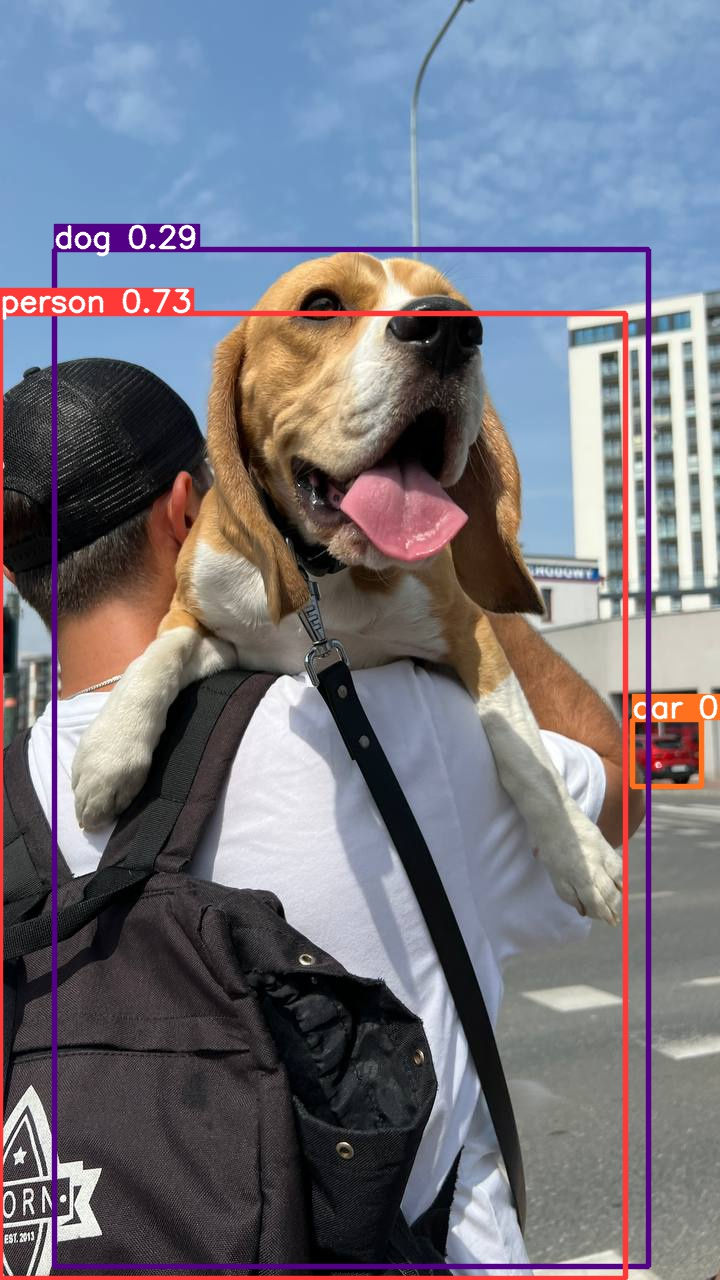

In [5]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [6]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /Users/hemant./Tension Intel/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 49.2ms
Speed: 1.3ms preprocess, 49.2ms inference, 433.0ms postprocess per image at shape (1, 3, 640, 384)


In [7]:
results[0].boxes.xyxy

tensor([[   0.0000,  313.1174,  625.3423, 1278.2100],
        [  54.8727,  249.9723,  648.0480, 1266.5559],
        [ 632.8656,  719.3997,  701.0421,  786.1913]])

In [8]:
results[0].boxes.conf

tensor([0.7257, 0.2869, 0.2858])

In [9]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

In [10]:
ls

ICU.v1i.yolov8/    icu.mp4            output_frames_v2/  yolov8n.pt
cropped_frames_v1/ icu2.mp4           runs/
cropped_frames_v2/ icu3.mp4           tension.ipynb
dog.jpeg           output_frames/     yolo.ipynb


In [11]:
# %cd /content/drive/MyDrive/icu

!yolo task=detect mode=train model=yolov8s.pt data="/Users/hemant./Tension Intel/ICU.v1i.yolov8/data.yaml" epochs=25 imgsz=224 plots=True save=True

100%|██████████████████████████████████████| 21.5M/21.5M [00:06<00:00, 3.42MB/s]
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.21 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Users/hemant./Tension Intel/ICU.v1i.yolov8/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=Fals

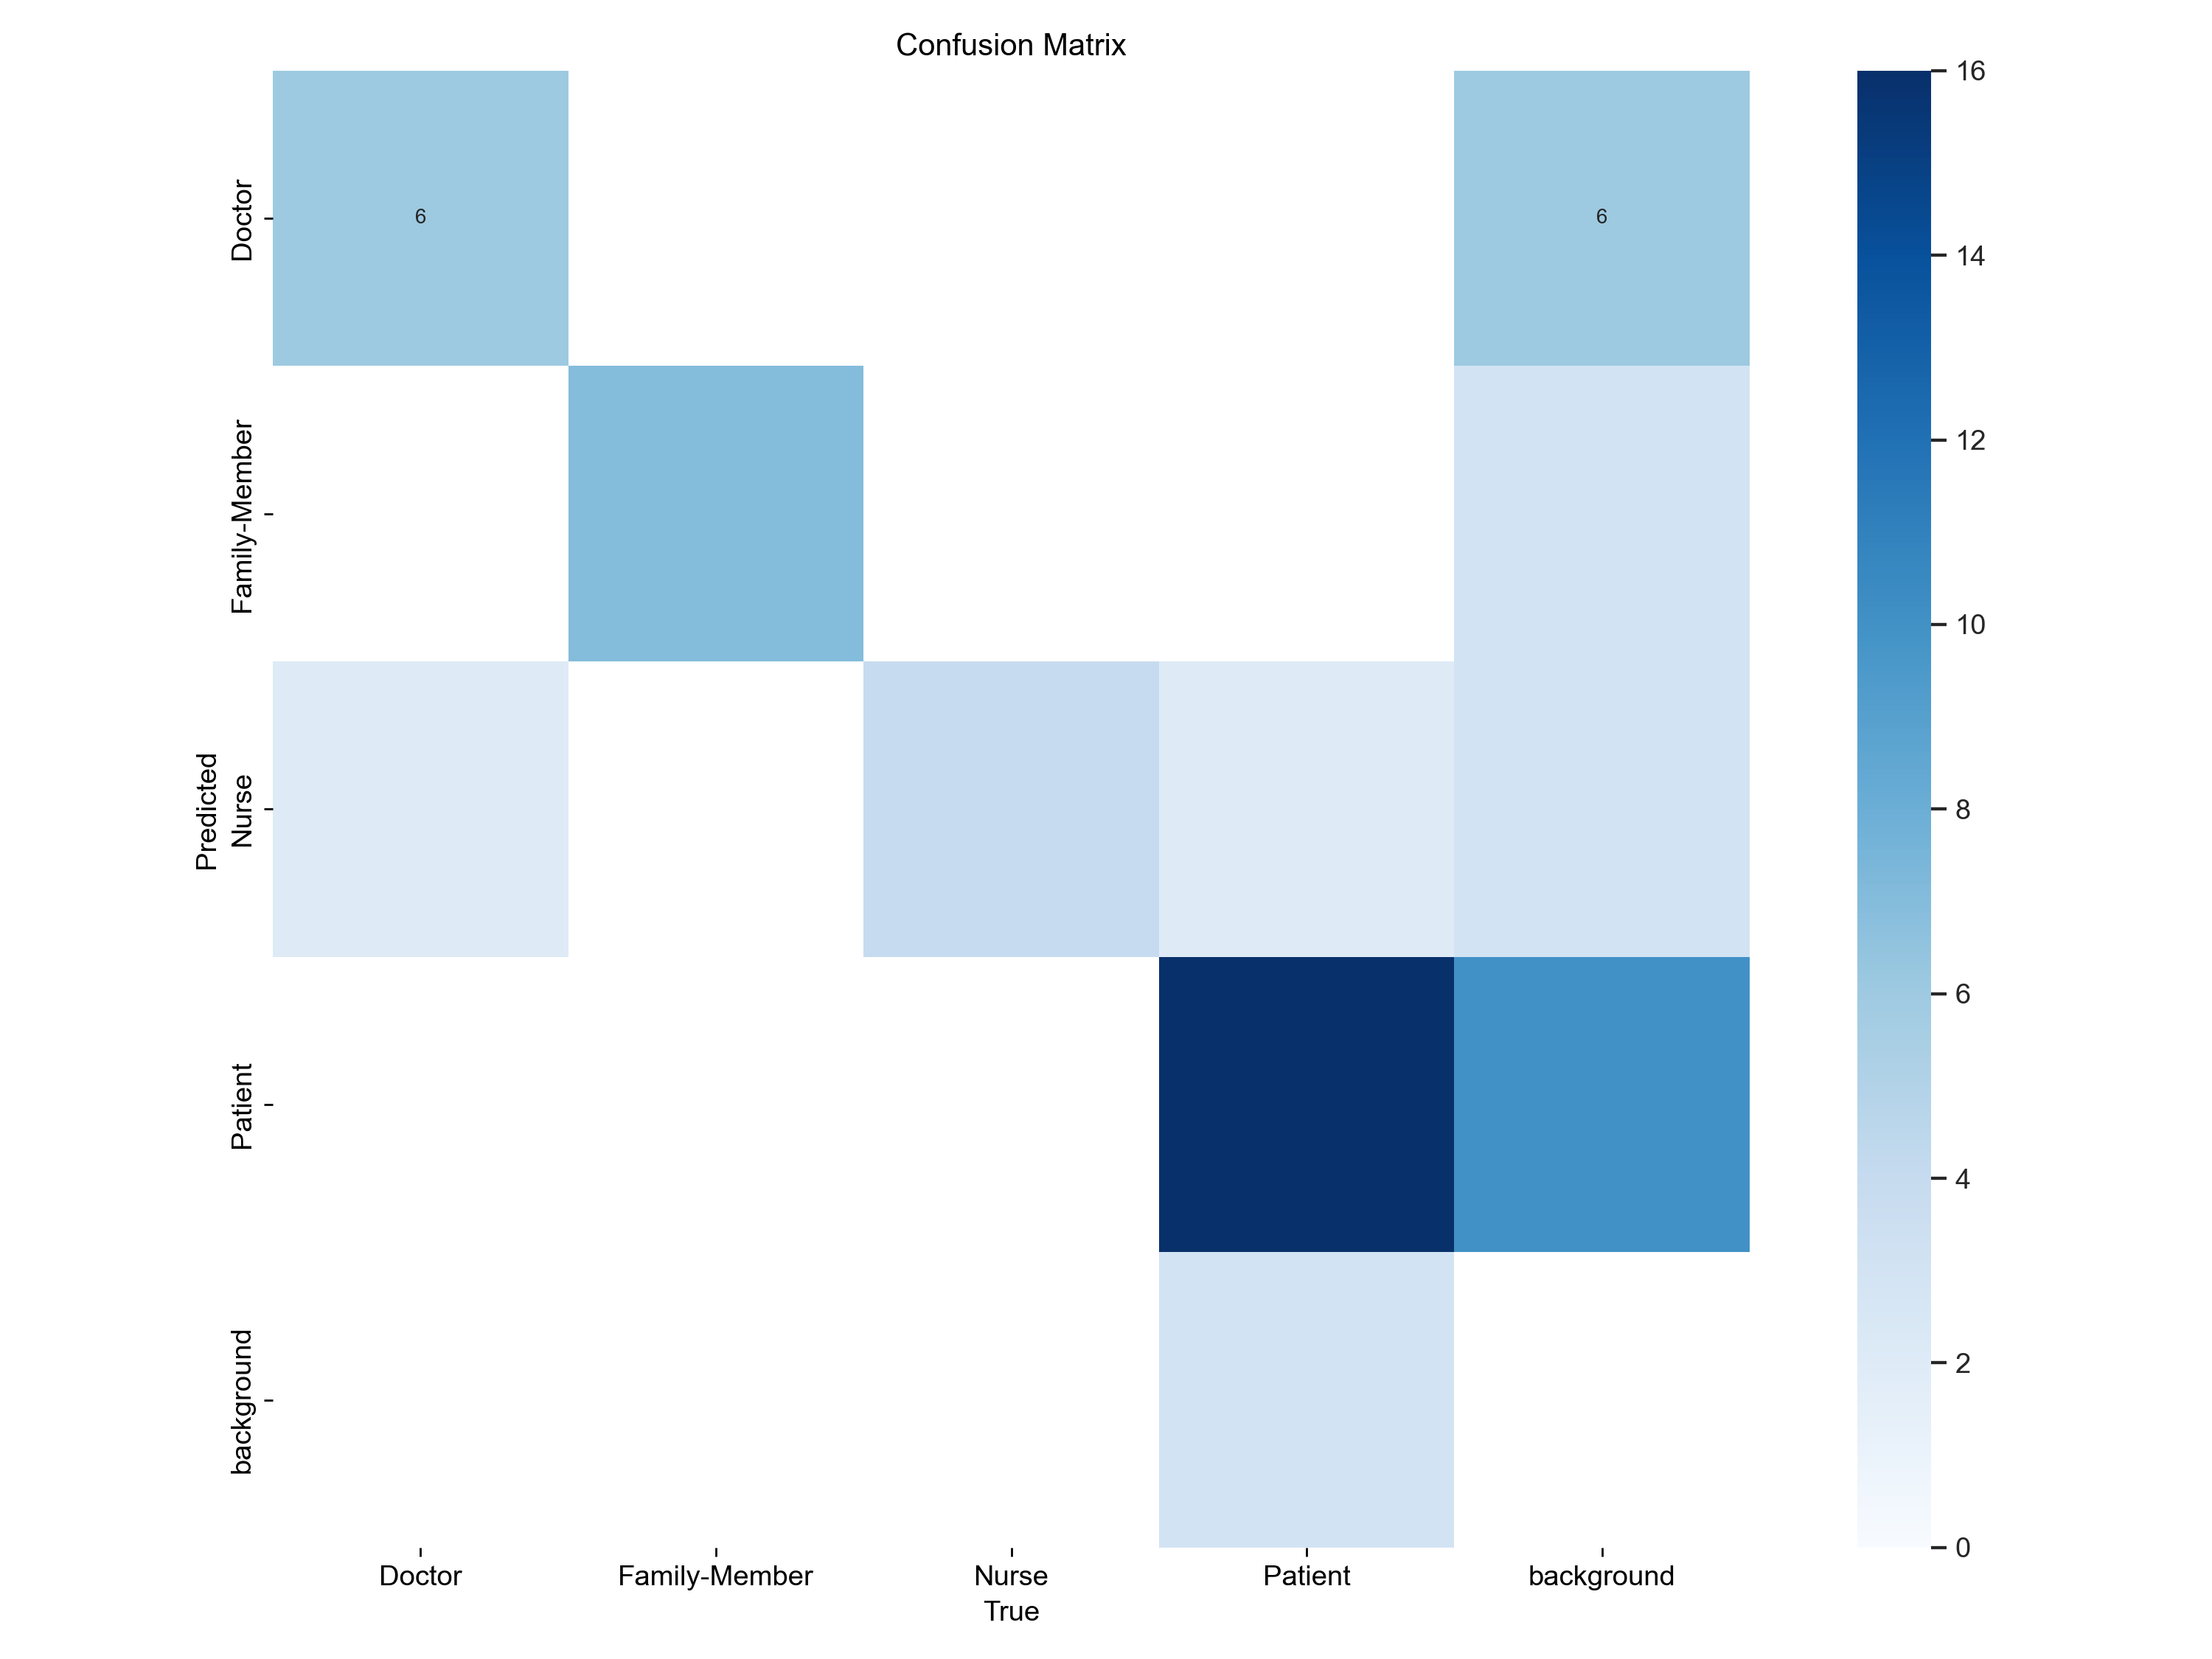

In [12]:
Image(filename='/Users/hemant./Tension Intel/runs/detect/train/confusion_matrix.png', width=600)


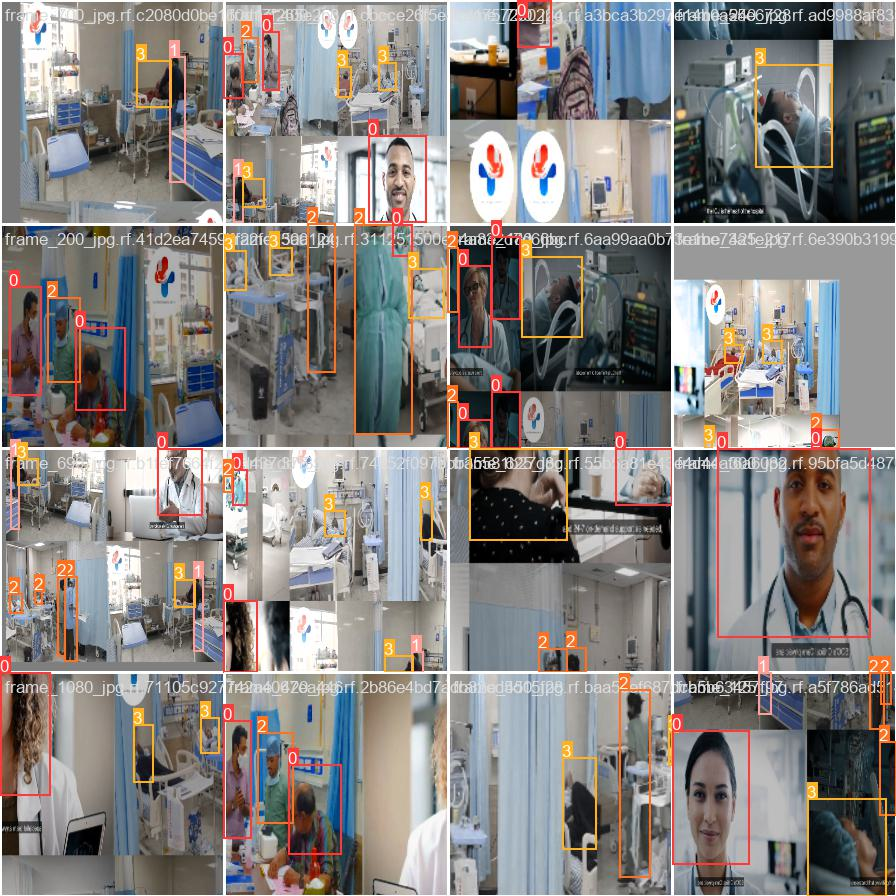

In [13]:
Image(filename='/Users/hemant./Tension Intel/runs/detect/train/train_batch1.jpg', width=600)

In [14]:
!yolo task=detect mode=val model="/Users/hemant./Tension Intel/runs/detect/train/weights/best.pt" data="/Users/hemant./Tension Intel/ICU.v1i.yolov8/data.yaml"


Ultralytics YOLOv8.2.21 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/hemant./Tension Intel/ICU.v1i.yolov8/valid/labels.cache... 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         13         40      0.867      0.872      0.908      0.424
                Doctor         13          8      0.977      0.875      0.944      0.521
         Family-Member         13          7        0.9      0.857      0.978      0.389
                 Nurse         13          4       0.79      0.948      0.945       0.51
               Patient         13         21      0.803       0.81      0.768      0.276
Speed: 0.2ms preprocess, 24.7ms inference, 0.0ms loss, 30.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [1]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [2]:
!yolo task=detect mode=predict model="/Users/hemant./Tension Intel/runs/detect/train/weights/best.pt" source="/Users/hemant./Tension Intel/icu.mp4" save=True

Ultralytics YOLOv8.2.21 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

[ WARN:0@2.336] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@2.336] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin0 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@2.337] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WAR

In [1]:
import cv2
import IPython.display as ipd
from IPython.display import clear_output
import time
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator

# Load model karenge
model = YOLO('/Users/hemant./Tension Intel/runs/detect/train/weights/best.pt')

video_path = 'icu.mp4'
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

display_rate = 0.5  
last_display_time = time.time()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(frame, show=True)
        detections = results[0] if isinstance(results, list) and len(results) > 0 else None

        
        annotator = Annotator(frame, line_width=2, font_size=10)

        if detections and hasattr(detections, 'boxes') and hasattr(detections.boxes, 'data'):
            box_data = detections.boxes.data
            if box_data is not None:
                for box in box_data:
                    x1, y1, x2, y2, conf, cls_id = map(int, box[:6])
                    label = detections.names.get(cls_id, 'Unknown')
                    annotator.box_label([x1, y1, x2, y2], f"{label} {conf:.2f}")

        annotated_frame = annotator.result()  

        # RGB me convert karega 
        annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        if time.time() - last_display_time > display_rate:
            ipd.display(ipd.Image(cv2.imencode('.png', annotated_frame)[1].tobytes()))
            clear_output(wait=True)
            last_display_time = time.time()

finally:
    cap.release()
    print("Video processing complete.")


Video processing complete.


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/Users/hemant./Tension Intel


In [12]:
train: "ICU.v1i.yolov8/train"
val: "ICU.v1i.yolov8/valid"

nc: 4  # number of classes
names: ['Patient', 'Doctor', 'Nurse', 'Family-Member']


In [14]:
from ultralytics import YOLO
import os

data_path = '/Users/hemant./Tension Intel/ICU.v1i.yolov8/data.yaml'
model_path = '/Users/hemant./Tension Intel/runs/detect/train/weights/best.pt'


model = YOLO(model_path)

results = model.val(data=data_path)


print(results)


Ultralytics YOLOv8.2.21 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /Users/hemant./Tension Intel/ICU.v1i.yolov8/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


                   all         13         40      0.867      0.872      0.908      0.424
                Doctor         13          8      0.977      0.875      0.944      0.521
         Family-Member         13          7        0.9      0.857      0.978      0.389
                 Nurse         13          4       0.79      0.948      0.945       0.51
               Patient         13         21      0.803       0.81      0.768      0.276
Speed: 0.2ms preprocess, 28.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x32ace92d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.

In [22]:
from ultralytics import YOLO

# Load the model
model_path = '/Users/hemant./Tension Intel/runs/detect/train/weights/best.pt'
data_path = '/Users/hemant./Tension Intel/ICU.v1i.yolov8/data.yaml'
model = YOLO(model_path)

# Run validation
results = model.val(data=data_path)

# Extract metrics
metrics = results.results_dict
precision = metrics['metrics/precision(B)']
recall = metrics['metrics/recall(B)']
map_50 = metrics['metrics/mAP50(B)']
map_50_95 = metrics['metrics/mAP50-95(B)']

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP@0.5: {map_50:.3f}")
print(f"mAP@0.5:0.95: {map_50_95:.3f}")

# Class-wise metrics
class_names = results.names
class_metrics = results.get('per_class')

print("\nClass-wise metrics:")
for class_idx, class_name in enumerate(class_names):
    precision = class_metrics['metrics/precision(B)'][class_idx]
    recall = class_metrics['metrics/recall(B)'][class_idx]
    map_50 = class_metrics['metrics/mAP50(B)'][class_idx]
    map_50_95 = class_metrics['metrics/mAP50-95(B)'][class_idx]
    
    print(f"Class: {class_name}")
    print(f" Precision: {precision:.3f}")
    print(f" Recall: {recall:.3f}")
    print(f" mAP@0.5: {map_50:.3f}")
    print(f" mAP@0.5:0.95: {map_50_95:.3f}")


Ultralytics YOLOv8.2.21 🚀 Python-3.11.5 torch-2.3.0 CPU (Apple M1)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /Users/hemant./Tension Intel/ICU.v1i.yolov8/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


                   all         13         40      0.867      0.872      0.908      0.424
                Doctor         13          8      0.977      0.875      0.944      0.521
         Family-Member         13          7        0.9      0.857      0.978      0.389
                 Nurse         13          4       0.79      0.948      0.945       0.51
               Patient         13         21      0.803       0.81      0.768      0.276
Speed: 0.2ms preprocess, 36.0ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/val9
Precision: 0.867
Recall: 0.872
mAP@0.5: 0.908
mAP@0.5:0.95: 0.424


AttributeError: 'DetMetrics' object has no attribute 'get'. See valid attributes below.

    This class is a utility class for computing detection metrics such as precision, recall, and mean average precision
    (mAP) of an object detection model.

    Args:
        save_dir (Path): A path to the directory where the output plots will be saved. Defaults to current directory.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class. Defaults to False.
        on_plot (func): An optional callback to pass plots path and data when they are rendered. Defaults to None.
        names (tuple of str): A tuple of strings that represents the names of the classes. Defaults to an empty tuple.

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot the precision-recall curves for each class.
        on_plot (func): An optional callback to pass plots path and data when they are rendered.
        names (tuple of str): A tuple of strings that represents the names of the classes.
        box (Metric): An instance of the Metric class for storing the results of the detection metrics.
        speed (dict): A dictionary for storing the execution time of different parts of the detection process.

    Methods:
        process(tp, conf, pred_cls, target_cls): Updates the metric results with the latest batch of predictions.
        keys: Returns a list of keys for accessing the computed detection metrics.
        mean_results: Returns a list of mean values for the computed detection metrics.
        class_result(i): Returns a list of values for the computed detection metrics for a specific class.
        maps: Returns a dictionary of mean average precision (mAP) values for different IoU thresholds.
        fitness: Computes the fitness score based on the computed detection metrics.
        ap_class_index: Returns a list of class indices sorted by their average precision (AP) values.
        results_dict: Returns a dictionary that maps detection metric keys to their computed values.
        curves: TODO
        curves_results: TODO
    

In [23]:
print(dir(results))
print(results.results_dict)
# Print other relevant attributes to inspect their contents


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']
{'metrics/precision(B)': 0.867323940381227, 'metrics/recall(B)': 0.872429567551545, 'metrics/mAP50(B)': 0.9084891215106732, 'metrics/mAP50-95(B)': 0.4238754023036301, 'fitness': 0.4723367742243344}


: 